# Task 3: Evaluate Techniques for Wifi Locationing 

# 0_PREPROCESSING 

# Import libraries

In [2]:
# basic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [3]:
path = '/home/ale/Dropbox/UBIQUM/4.DeepAnalytics&Visualization/T4M3.WiFiLocationing/Data/UJIndoorLoc/'
file = 'TestData.csv'

Test_data = pd.read_csv(path + file)

Test_data.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7515.916799,4.864890e+06,1,1,0,0,0,0,1380872703
1,100,100,100,100,100,100,100,100,100,100,...,100,-7383.867221,4.864840e+06,4,2,0,0,0,13,1381155054
2,100,100,100,100,100,100,100,100,100,100,...,100,-7374.302080,4.864847e+06,4,2,0,0,0,13,1381155095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7365.824883,4.864843e+06,4,2,0,0,0,13,1381155138
4,100,100,100,100,100,100,100,100,100,100,...,100,-7641.499303,4.864922e+06,2,0,0,0,0,2,1380877774


## Test INPUT DATA (get an idea of the possible WAP values)

First take a random sample of the original dataframe and make a copy


In [4]:
Test_dataPossibleValues = Test_data
Test_dataPossibleValues = Test_dataPossibleValues.sample(frac =1, random_state= 200)  # frac= XX takes a random sample of XX% of the data

Drop the non WAP's features

In [5]:
Test_dataPossibleValues = Test_dataPossibleValues.drop(['LONGITUDE', 'LATITUDE', 'FLOOR', 'BUILDINGID', 'SPACEID',
       'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP'], axis = 1)

And plot it..

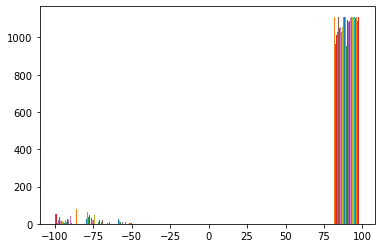

In [6]:
plt.hist(Test_dataPossibleValues)
plt.show();

- Seems that the great majority of values of singal strenght is +100, wich means "device out of range from THAT wap". 
- Then some values between -100 and -50. According to the paper, "the RSSI levels correspond to negative integer values 6 measured in dBm, where −100dBm is equivalent to a very weak signal, whereas 0dBM means that the detected WAP has an extremely good signal."

This graph is not very representative of the Test Data. A possible way is to ignore the "Out Of Range Values" replaceing them by a np.nan (as they are not considered in a plot). 

In [7]:
Test_dataPossibleValues = Test_dataPossibleValues.replace([100],np.nan)
Test_dataPossibleValues.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-95.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


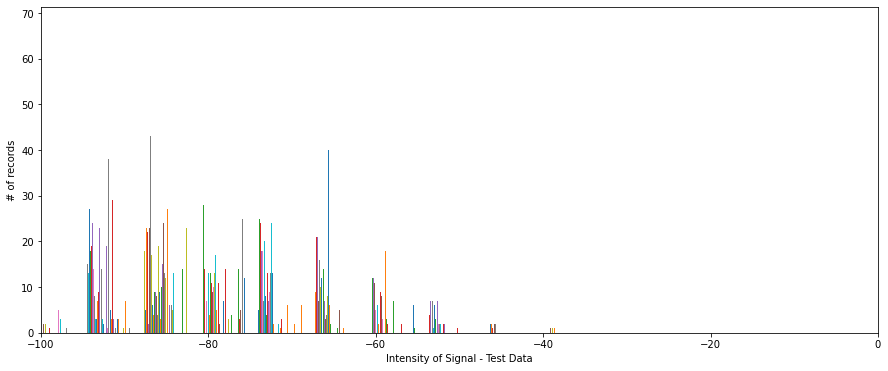

In [10]:
plt.hist(Test_dataPossibleValues, bins = 10)

plt.xlabel('Intensity of Signal - Test Data')
plt.ylabel('# of records')

plt.xlim(-100,0)

plt.savefig("Intensity of Signal - Test Data", format= "png",bbox_inches='tight' )

plt.rcParams['figure.figsize'] = [15, 6]

plt.show();

- there are no (or very few) values with a STRONG signal intensity. Most of them falls between -100 and -30, but there is no 0dB, not even close to it. 
- The most probable values of signal intensity can be found between -95 and -65dB.   

## OUTPUT VARIABLES
the main objective of the project is to use signal strenght as an input, to guess the location of the cellphones. 

So the outputs are the location variables: 
- **FLOOR**
- **BUILDING**
- **LAT**
- **LONG**. 

### FLOOR

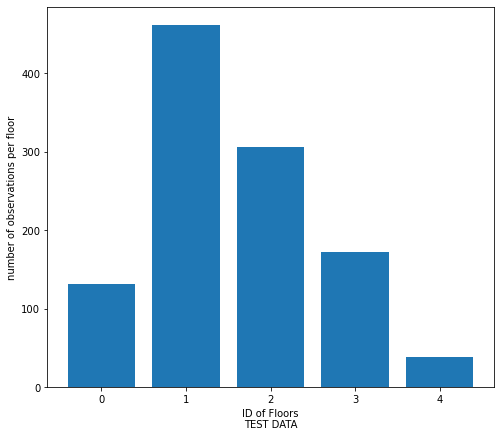

In [51]:
# use plt.bar instead of plt.hist because it can use align='center'. Also removes the float values from the Xaxis
labels, counts = np.unique(Test_data['FLOOR'], return_counts=True)

plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)

plt.xlabel('ID of Floors\nTEST DATA')
plt.ylabel('number of observations per floor')

plt.rcParams['figure.figsize'] = [8,7]
#plt.rcParams['figure.figsize'] = [15, 6]

plt.savefig("hist_floor_test", format= "png",bbox_inches='tight' )

plt.show()

- Umbalanced data, there are a lot of datapoints from FLOORS 1 to 3, and only a few of 0 and 4. 

### BUILDING ID

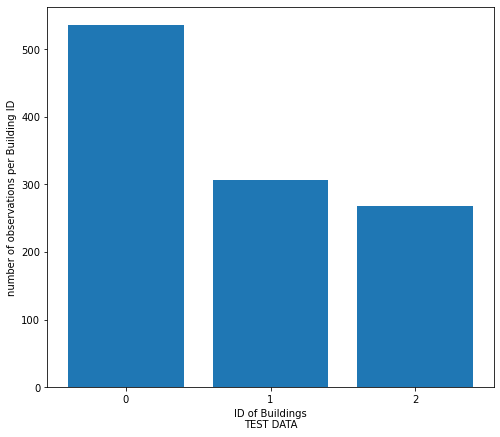

In [50]:
labels, counts = np.unique(Test_data["BUILDINGID"], return_counts=True)

plt.xlabel('ID of Buildings\nTEST DATA')
plt.ylabel('number of observations per Building ID')


plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)

plt.show()

- again, quite umbalanced data. Most of data comes from the BuildingID = 0

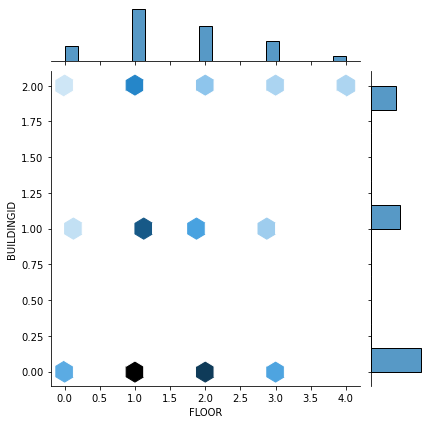

In [54]:
# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
sns.jointplot(x=Test_data['FLOOR'], y=Test_data['BUILDINGID'], kind='hex')

plt.show()

it's interesting to combine Floor/Building in a sinlge graph.
- most of Test data comes from buildingID=0 / Floor=1.
- Not all the buildings have 4 floors. In fact, only BuildingID = 2 has 4 floors. 

### LATITUDE AND LONGITUDE

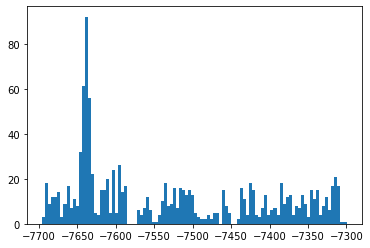

In [17]:
plt.hist(Val_data["LONGITUDE"], bins = 100)
plt.show()

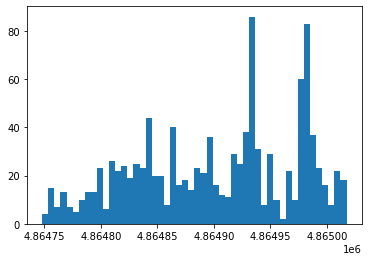

In [18]:
plt.hist(Val_data["LATITUDE"], bins = 50)
plt.show()

# Save Data

In [55]:
path = '/home/ale/Dropbox/UBIQUM/4.DeepAnalytics&Visualization/T4M3.WiFiLocationing/Data/'
file = "0_DataPrepro_Test.csv"

Test_data.to_csv(path + file, index = False)

# load to check how it's saved
Saved_Test_data = pd.read_csv(path + file)

Saved_Test_data.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7515.916799,4.864890e+06,1,1,0,0,0,0,1380872703
1,100,100,100,100,100,100,100,100,100,100,...,100,-7383.867221,4.864840e+06,4,2,0,0,0,13,1381155054
2,100,100,100,100,100,100,100,100,100,100,...,100,-7374.302080,4.864847e+06,4,2,0,0,0,13,1381155095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7365.824883,4.864843e+06,4,2,0,0,0,13,1381155138
4,100,100,100,100,100,100,100,100,100,100,...,100,-7641.499303,4.864922e+06,2,0,0,0,0,2,1380877774


# Data to Guess Building

## 1.1 Keep Usefull features

With usefull features I mean, a DF with just Inputs/Outputs (predictor/predicted features) for each case

In [57]:
Test_data_Building = Test_data.drop(columns = ['LONGITUDE', 'LATITUDE', 'FLOOR', 'SPACEID','RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP'])

Test_data_Building.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,BUILDINGID
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,1
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,2
2,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,2
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,2
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,0


## 1.2 Dummify

In this case it's not needed, because i'm using all numerical variables to predict a categorical variable. 

## 1.3 Sample Data

As there is a lot of data, is a good idea to fail faster with a reduced proportion of the data

In [27]:
#sample =  Vdata_Building

In [31]:
Vdata_Building = sample.sample(frac =1, random_state= 200)

print("Len of the DF :" + str(len(Vdata_Building)))

#Tdata_Building.head()

Len of the DF :1111


## 1.4 X/y Split

In [32]:
X_Vd_building = Vdata_Building.iloc[:,0:520]
y_Vd_building = Vdata_Building.iloc[:,520:521]

X_Vd_building.head() # check predictors

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
636,100,100,100,100,100,100,100,-95,100,100,...,100,100,100,100,100,100,100,100,100,100
64,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
463,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
820,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
107,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100


In [33]:
y_Vd_building.head() # check predicted

,BUILDINGID
636,0
64,0
463,0
820,1
107,0


## 1.5 Save PreProcessed Data

In [34]:
path = '/home/ale/Dropbox/UBIQUM/4.DeepAnalytics&Visualization/T4M3.WiFiLocationing/Data/'
file_X = "1_Val_DataPrepro_Building_X.csv"
file_y = "1_Val_DataPrepro_Building_y.csv"

X_Vd_building.to_csv(path + file_X, index = False)
y_Vd_building.to_csv(path + file_y, index = False)

# Data To Floor

## 2.1 Keep Usefull features

In [49]:
# make a copy of the dataset, keeping only the predictor/predicted features
Vdata_Floor = Val_data.drop(columns = ['LONGITUDE', 'LATITUDE', 'SPACEID', 'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP'])

#Vdata_Floor.head()

## 2.2 Dummify

Now, as there is a categorical variable that will be used as a predictor (input) is important to dummify (binarize) it. 

In [42]:
Vdata_Floor = pd.get_dummies(Vdata_Floor, columns = ['BUILDINGID'])
Vdata_Floor.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,FLOOR,BUILDINGID_0,BUILDINGID_1,BUILDINGID_2
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,1,0,1,0
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,4,0,0,1
2,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,4,0,0,1
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,4,0,0,1
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,2,1,0,0


## 2.3 Sample Data

As there is a lot of data, is a good idea to fail faster with a reduced proportion of the data

In [43]:
sample =  Vdata_Floor

In [44]:
Vdata_Floor = sample.sample(frac =1, random_state= 200)

print("Len of the DF :" + str(len(Vdata_Floor)))

#Tdata_Building.head()

Len of the DF :1111


## 2.4 X/y Split

In [45]:
y_Vd_floor = Vdata_Floor.iloc[:,520:521]
X_Vd_floor = Vdata_Floor.drop(columns = ['FLOOR'])


X_Vd_floor.head() # check predictors

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,BUILDINGID_0,BUILDINGID_1,BUILDINGID_2
636,100,100,100,100,100,100,100,-95,100,100,...,100,100,100,100,100,100,100,1,0,0
64,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,1,0,0
463,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,1,0,0
820,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,0,1,0
107,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,1,0,0


In [47]:
y_Vd_floor.head() # check predicted

,FLOOR
636,2
64,0
463,2
820,2
107,0


## 2.5 Save PreProcessed Data

In [48]:
path = '/home/ale/Dropbox/UBIQUM/4.DeepAnalytics&Visualization/T4M3.WiFiLocationing/Data/'
file_X = "2_Val_DataPrepro_Floor_X.csv"
file_y = "2_Val_DataPrepro_Floor_y.csv"

X_Vd_building.to_csv(path + file_X, index = False)
y_Vd_building.to_csv(path + file_y, index = False)

# Data to Latitude

## 3.1 Keep Usefull features

In [50]:
# make a copy of the dataset, keeping only the predictor/predicted features
Vdata_LAT = Val_data.drop(columns = ['LONGITUDE', 'SPACEID', 'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP'])

Vdata_LAT.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,LATITUDE,FLOOR,BUILDINGID
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,4.864890e+06,1,1
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,4.864840e+06,4,2
2,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,4.864847e+06,4,2
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,4.864843e+06,4,2
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,4.864922e+06,2,0


### 3.2 Dummify

Now, as there is a categorical variable that will be used as a predictor (input) is important to dummify (binarize) it. 

In [51]:
Vdata_LAT = pd.get_dummies(Vdata_LAT, columns = ['BUILDINGID', 'FLOOR'])
Vdata_LAT.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LATITUDE,BUILDINGID_0,BUILDINGID_1,BUILDINGID_2,FLOOR_0,FLOOR_1,FLOOR_2,FLOOR_3,FLOOR_4
0,100,100,100,100,100,100,100,100,100,100,...,100,4.864890e+06,0,1,0,0,1,0,0,0
1,100,100,100,100,100,100,100,100,100,100,...,100,4.864840e+06,0,0,1,0,0,0,0,1
2,100,100,100,100,100,100,100,100,100,100,...,100,4.864847e+06,0,0,1,0,0,0,0,1
3,100,100,100,100,100,100,100,100,100,100,...,100,4.864843e+06,0,0,1,0,0,0,0,1
4,100,100,100,100,100,100,100,100,100,100,...,100,4.864922e+06,1,0,0,0,0,1,0,0


## 3.3 Sample Data

As there is a lot of data, is a good idea to fail faster with a reduced proportion of the data

In [52]:
sample = Vdata_LAT

In [53]:
Vdata_LAT = sample.sample(frac =1, random_state= 200)

print("Len of the DF :" + str(len(Vdata_LAT)))

#Tdata_Building.head()

Len of the DF :1111


## 3.4 X/y Split

- Input  > WAPS[0..520), BUILDINGID, FLOOR
- Output > LAT

In [55]:
y_Vd_lat = Vdata_LAT.iloc[:,520:521]
X_Vd_lat = Vdata_LAT.drop(columns = ['LATITUDE'])


X_Vd_lat.head() # check predictors

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP519,WAP520,BUILDINGID_0,BUILDINGID_1,BUILDINGID_2,FLOOR_0,FLOOR_1,FLOOR_2,FLOOR_3,FLOOR_4
636,100,100,100,100,100,100,100,-95,100,100,...,100,100,1,0,0,0,0,1,0,0
64,100,100,100,100,100,100,100,100,100,100,...,100,100,1,0,0,1,0,0,0,0
463,100,100,100,100,100,100,100,100,100,100,...,100,100,1,0,0,0,0,1,0,0
820,100,100,100,100,100,100,100,100,100,100,...,100,100,0,1,0,0,0,1,0,0
107,100,100,100,100,100,100,100,100,100,100,...,100,100,1,0,0,1,0,0,0,0


In [56]:
y_Vd_lat.head() # check predicted

,LATITUDE
636,4.864987e+06
64,4.864933e+06
463,4.864935e+06
820,4.864863e+06
107,4.864999e+06


## 3.5 Save PreProcessed Data

In [57]:
path = '/home/ale/Dropbox/UBIQUM/4.DeepAnalytics&Visualization/T4M3.WiFiLocationing/Data/'
file_X = "3_Val_DataPrepro_LAT_X.csv"
file_y = "3_Val_DataPrepro_LAT_y.csv"

X_Vd_building.to_csv(path + file_X, index = False)
y_Vd_building.to_csv(path + file_y, index = False)

# Data to Longitude

## 4.1 Keep Usefull features

In [62]:
# make a copy of the dataset, keeping only the predictor/predicted features
Vdata_LON = Val_data.drop(columns = ['SPACEID', 'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP'])

Vdata_LON.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,-7515.916799,4.864890e+06,1,1
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,-7383.867221,4.864840e+06,4,2
2,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,-7374.302080,4.864847e+06,4,2
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,-7365.824883,4.864843e+06,4,2
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,-7641.499303,4.864922e+06,2,0


### 4.2 Dummify

In [64]:
Vdata_LON = pd.get_dummies(Vdata_LON, columns = ['BUILDINGID', 'FLOOR'])
Vdata_LON.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,LONGITUDE,LATITUDE,BUILDINGID_0,BUILDINGID_1,BUILDINGID_2,FLOOR_0,FLOOR_1,FLOOR_2,FLOOR_3,FLOOR_4
0,100,100,100,100,100,100,100,100,100,100,...,-7515.916799,4.864890e+06,0,1,0,0,1,0,0,0
1,100,100,100,100,100,100,100,100,100,100,...,-7383.867221,4.864840e+06,0,0,1,0,0,0,0,1
2,100,100,100,100,100,100,100,100,100,100,...,-7374.302080,4.864847e+06,0,0,1,0,0,0,0,1
3,100,100,100,100,100,100,100,100,100,100,...,-7365.824883,4.864843e+06,0,0,1,0,0,0,0,1
4,100,100,100,100,100,100,100,100,100,100,...,-7641.499303,4.864922e+06,1,0,0,0,0,1,0,0


## 4.3 Sample Data

As there is a lot of data, is a good idea to fail faster with a reduced proportion of the data

In [65]:
sample = Vdata_LON

In [66]:
Vdata_LON = sample.sample(frac =1, random_state= 200)

print("Len of the DF :" + str(len(Vdata_LON)))

#Tdata_Building.head()

Len of the DF :1111


## 4.4 X/y Split

- Input  > WAPS[0..520), BUILDINGID, FLOOR, LAT
- Output > LON

In [68]:
y_Vd_lon = Vdata_LON.iloc[:,520:521]
X_Vd_lon = Vdata_LON.drop(columns = ['LONGITUDE'])


X_Vd_lon.head() # check predictors

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LATITUDE,BUILDINGID_0,BUILDINGID_1,BUILDINGID_2,FLOOR_0,FLOOR_1,FLOOR_2,FLOOR_3,FLOOR_4
636,100,100,100,100,100,100,100,-95,100,100,...,100,4.864987e+06,1,0,0,0,0,1,0,0
64,100,100,100,100,100,100,100,100,100,100,...,100,4.864933e+06,1,0,0,1,0,0,0,0
463,100,100,100,100,100,100,100,100,100,100,...,100,4.864935e+06,1,0,0,0,0,1,0,0
820,100,100,100,100,100,100,100,100,100,100,...,100,4.864863e+06,0,1,0,0,0,1,0,0
107,100,100,100,100,100,100,100,100,100,100,...,100,4.864999e+06,1,0,0,1,0,0,0,0


In [69]:
y_Vd_lon.head() # check predicted

,LONGITUDE
636,-7587.539083
64,-7682.455650
463,-7676.753700
820,-7507.640600
107,-7639.109633


## 4.5 Save PreProcessed Data

In [70]:
path = '/home/ale/Dropbox/UBIQUM/4.DeepAnalytics&Visualization/T4M3.WiFiLocationing/Data/'
file_X = "4_Val_DataPrepro_LON_X.csv"
file_y = "4_Val_DataPrepro_LON_y.csv"

X_Vd_building.to_csv(path + file_X, index = False)
y_Vd_building.to_csv(path + file_y, index = False)